# Analyzing Pokemon Championship

## Read csv file from kaggle

In [1]:
pokedex_original <- read.csv('/kaggle/input/complete-pokemon-dataset-updated-090420/pokedex_(Update_05.20).csv', header=T)
pokemon_names <- read.table('/kaggle/input/pokemonnames/pokemon-names.txt', sep='\t', quote="", header=T)

In [2]:
head(pokedex_original)
names(pokedex_original)
head(pokemon_names)

,X,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
2,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
3,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
4,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
5,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
6,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5


[1] "X"                "pokedex_number"   "name"             "german_name"     
 [5] "japanese_name"    "generation"       "status"           "species"         
 [9] "type_number"      "type_1"           "type_2"           "height_m"        
[13] "weight_kg"        "abilities_number" "ability_1"        "ability_2"       
[17] "ability_hidden"   "total_points"     "hp"               "attack"          
[21] "defense"          "sp_attack"        "sp_defense"       "speed"           
[25] "catch_rate"       "base_friendship"  "base_experience"  "growth_rate"     
[29] "egg_type_number"  "egg_type_1"       "egg_type_2"       "percentage_male" 
[33] "egg_cycles"       "against_normal"   "against_fire"     "against_water"   
[37] "against_electric" "against_grass"    "against_ice"      "against_fight"   
[41] "against_poison"   "against_ground"   "against_flying"   "against_psychic" 
[45] "against_bug"      "against_rock"     "against_ghost"    "against_dragon"  
[49] "against_dark"     "against_steel"    "against_fairy"

,번호,한국어,일본어,영어,프랑스어,독일어,중국어,스페인어,이탈리아어
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,이상해씨,フシギダネ,Bulbasaur,Bulbizarre,Bisasam,妙蛙種子,Bulbasaur,Bulbasaur
2,2,이상해풀,フシギソウ,Ivysaur,Herbizarre,Bisaknosp,妙蛙草,Ivysaur,Ivysaur
3,3,이상해꽃,フシギバナ,Venusaur,Florizarre,Bisaflor,妙蛙花,Venusaur,Venusaur
4,4,파이리,ヒトカゲ,Charmander,Salamèche,Glumanda,小火龍,Charmander,Charmander
5,5,리자드,リザード,Charmeleon,Reptincel,Glutexo,火恐龍,Charmeleon,Charmeleon
6,6,리자몽,リザードン,Charizard,Dracaufeu,Glurak,噴火龍,Charizard,Charizard


### preprocessing

In [3]:
library(dplyr)
library(stringr)
library(data.table)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [4]:
pokedex_selected <- pokedex_original %>% select(pokedex_number, name, generation, status, type_number, type_1, type_2, height_m, weight_kg, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, growth_rate, percentage_male)
head(pokedex_selected)

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,45,Medium Slow,87.5
5,4,Charmander,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
6,5,Charmeleon,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5


In [5]:
pokedex <- pokedex_selected
pokedex <- pokedex %>% filter(!str_detect(pokedex$name, "Mega"))
pokedex <- pokedex %>% filter(!str_detect(pokedex$name, "Eternamax"))

In [6]:
pokedex_kor <- merge(x=pokedex, y=pokemon_names[,1:2], by.x='pokedex_number', by.y='번호')
pokedex_kor <- pokedex_kor %>% select(pokedex_number, name, 한국어, generation, status, type_number, type_1, type_2, height_m, weight_kg, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, growth_rate, percentage_male)
names(pokedex_kor)[2:3] <- c('eng_name', 'kor_name')
head(pokedex_kor)

,pokedex_number,eng_name,kor_name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,이상해씨,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,이상해풀,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,이상해꽃,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,4,Charmander,파이리,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
5,5,Charmeleon,리자드,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5
6,6,Charizard,리자몽,1,Normal,2,Fire,Flying,1.7,90.5,534,78,84,78,109,85,100,45,Medium Slow,87.5


## Analysis

## Topic 1: 세대 별 600족 분포

### 세대별 600족 분포

In [7]:
total600 <- pokedex_kor[pokedex_kor$total_points >= 600, ]

In [8]:
points_count <- t(aggregate(total600$kor_name, list(total600$generation), length))
rownames(points_count) <- c("Gen", "Count")
points_count

Gen,1,2,3,4,5,6,7,8
Count,3,4,15,13,12,10,12,6


Gen = Generation (세대)

In [9]:
points_names <- aggregate(total600$kor_name, list(total600$generation), paste)
colnames(points_names) <- c("Gen", "Count")
points_names

Gen,Count
<int>,<list>
1,"망나뇽, 뮤츠 , 뮤"
2,"마기라스, 루기아 , 칠색조 , 세레비"
3,"게을킹 , 보만다 , 메타그로스, 라티아스 , 라티오스 , 가이오가 , 가이오가 , 그란돈 , 그란돈 , 레쿠쟈 , 지라치 , 테오키스 , 테오키스 , 테오키스 , 테오키스"
4,"한카리아스, 디아루가 , 펄기아 , 히드런 , 레지기가스, 기라티나 , 기라티나 , 크레세리아, 마나피 , 다크라이 , 쉐이미 , 쉐이미 , 아르세우스"
5,"비크티니 , 삼삼드래 , 레시라무 , 제크로무 , 랜드로스 , 랜드로스 , 큐레무 , 큐레무 , 큐레무 , 메로엣타 , 메로엣타 , 게노세크트"
6,"개굴닌자 , 미끄래곤 , 제르네아스, 이벨타르 , 지가르데 , 지가르데 , 디안시 , 후파 , 후파 , 볼케니온"
7,"약어리 , 짜랑고우거, 솔가레오 , 루나아라 , 네크로즈마, 네크로즈마, 네크로즈마, 네크로즈마, 마기아나 , 마샤도 , 제라오라 , 멜메탈"
8,"드래펄트 , 자시안 , 자시안 , 자마젠타 , 자마젠타 , 무한다이노"


### 비전설, 비환상종

**가설 1. 600족에는 전설 포켓몬이나 환상 포켓몬이 많을 것이다.**  
전설 및 환상 포켓몬은 게임 진행에 있어 포획하기 어렵거나 후반에 포획하게 된다. 그래서 전설이나 환상 포켓몬이 아닌 포켓몬스터 중에 600족이 있는지 확인해보고자 한다.

In [10]:
total600_normal <- total600[total600$status == 'Normal', ]

In [11]:
points_normal_count <- t(aggregate(total600_normal$kor_name, list(total600_normal$generation), length))
rownames(points_normal_count) <- c("Gen", "Count")
points_normal_count

Gen,1,2,3,4,5,6,7,8
Count,1,1,3,1,1,2,2,1


In [12]:
points_normal_names <- aggregate(total600_normal$kor_name, list(total600_normal$generation), paste)
colnames(points_normal_names) <- c("Gen", "kor_names")
points_normal_names

Gen,kor_names
<int>,<list>
1,망나뇽
2,마기라스
3,"게을킹 , 보만다 , 메타그로스"
4,한카리아스
5,삼삼드래
6,"개굴닌자, 미끄래곤"
7,"약어리 , 짜랑고우거"
8,드래펄트


**결론 1. 600족에는 전설 포켓몬이나 환상 포켓몬이 많다.**  
앞서 말했듯 비전설 비환상 포켓몬은 후반에 등장하거나 포획이 어려우므로,
밑에서 제시하는 포켓몬들을 이용하면 스토리 진행에 용이할 것이다.

## Topic 2: 세대별 종족값 분포

In [13]:
total_points_mean <- data.frame()
for (i in 1:8) total_points_mean[1, i] <- mean(pokedex_kor[pokedex_kor$generation==i, ]$total_points)
colnames(total_points_mean) <- paste("Gen", 1:8, sep="")
rownames(total_points_mean) <- "Mean"
total_points_mean

,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Gen7,Gen8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,406.9831,406.03,412.1586,451.931,434.5118,439.4881,459.2323,430.4368


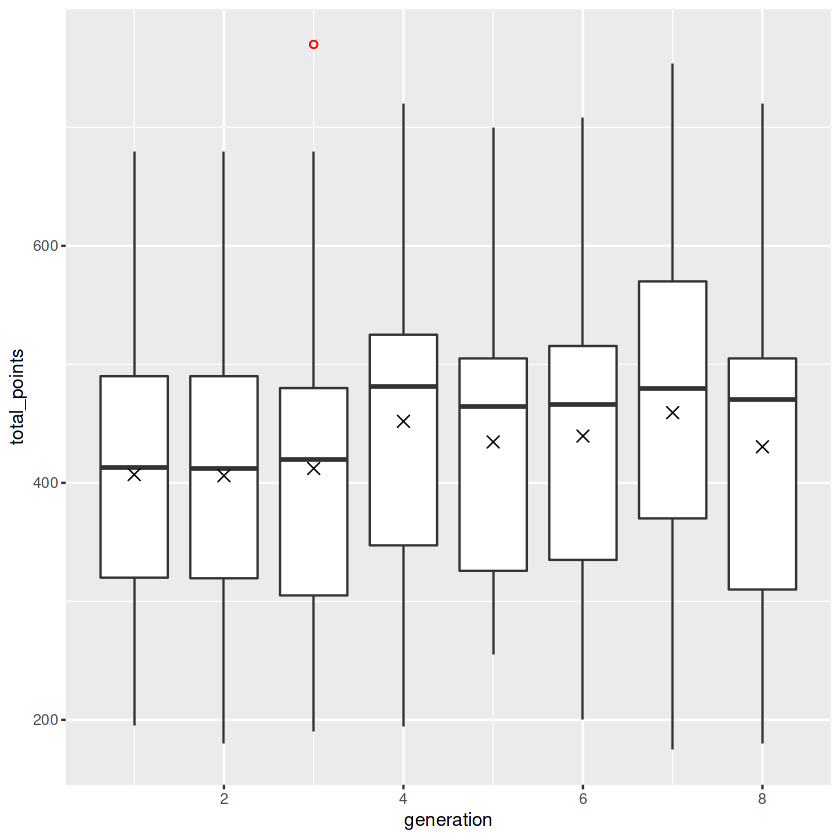

In [14]:
pokedex_kor %>% ggplot(aes(x=generation, y=total_points, group=generation)) + geom_boxplot(outlier.color="red", outlier.shape=1) + stat_summary(fun="mean", geom="point", fill="blue", shape=4, size=3)

x는 평균을 의미하고, 빨간 점은 Outlier를 의미한다.  
**그래프를 보아, 세대 별 종족값에 대해서는
어떤 패턴이 보이지 않는다.**

In [15]:
range(pokedex_kor$total_points)

[1] 175 770

In [16]:
points_groups <- list()
for (i in 1:8){
    total_points_geni <- pokedex_kor[pokedex_kor$generation==i,]$total_points
    cut_geni <- cut(total_points_geni, 1:8*100-1)
    points_groups[[i]] <- aggregate(total_points_geni, list(cut_geni), length, drop=F)
    points_groups[[i]][is.na(points_groups[[i]])] <- 0
    names(points_groups[[i]])[2] <- paste("Gen",as.character(i),sep="")
    if (i>1) points_table <- merge(points_table, points_groups[[i]], by="Group.1", all=T)
    else points_table <- points_groups[[i]]
}
names(points_table)[1] <- "Group"

In [17]:
points_table <- points_table[order(points_table$Group), ]
rownames(points_table) <- 1:7
points_table

,Group,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Gen7,Gen8
,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,"(99,199]",2,1,3,1,0,0,1,2
2,"(199,299]",22,17,27,11,17,7,11,15
3,"(299,399]",55,21,29,24,50,25,14,12
4,"(399,499]",61,37,58,32,57,25,35,30
5,"(499,599]",34,20,13,35,34,17,26,22
6,"(599,699]",3,4,13,12,10,9,11,4
7,"(699,799]",0,0,2,1,2,1,1,2


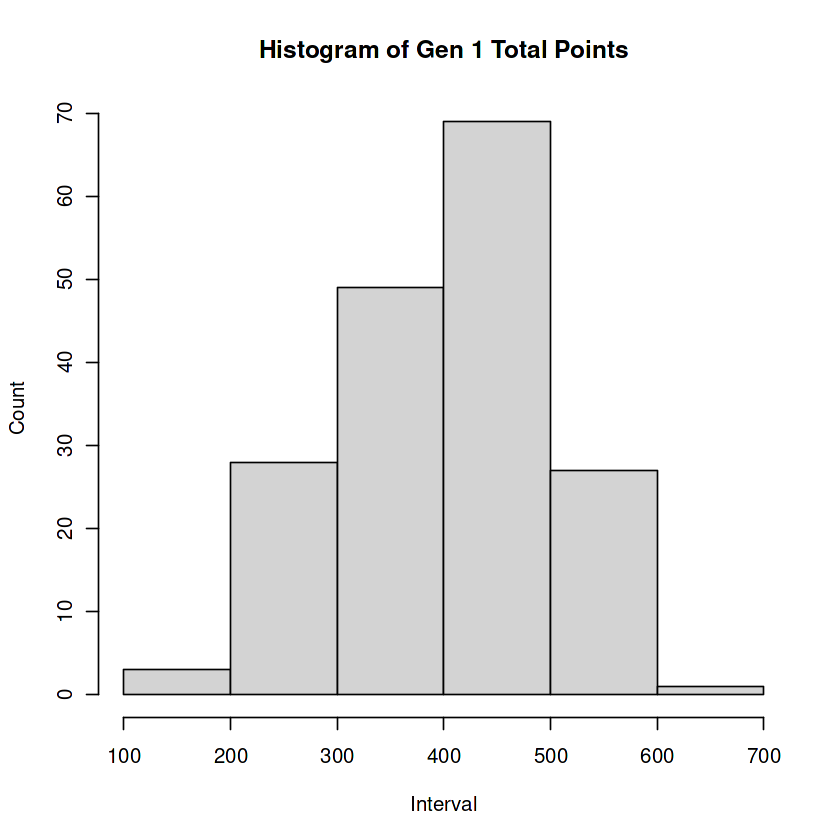

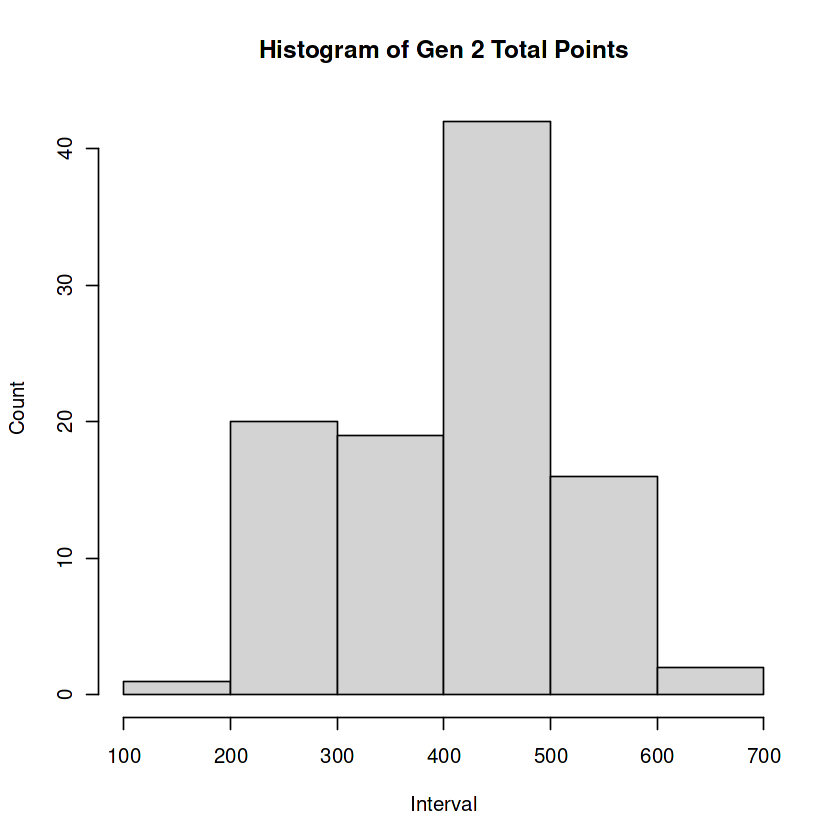

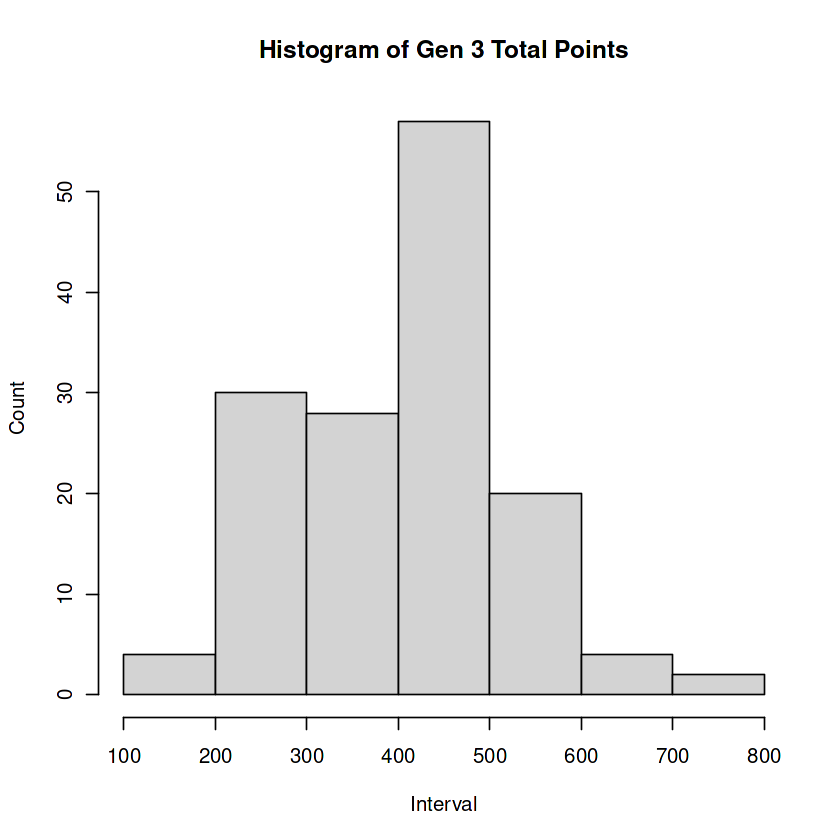

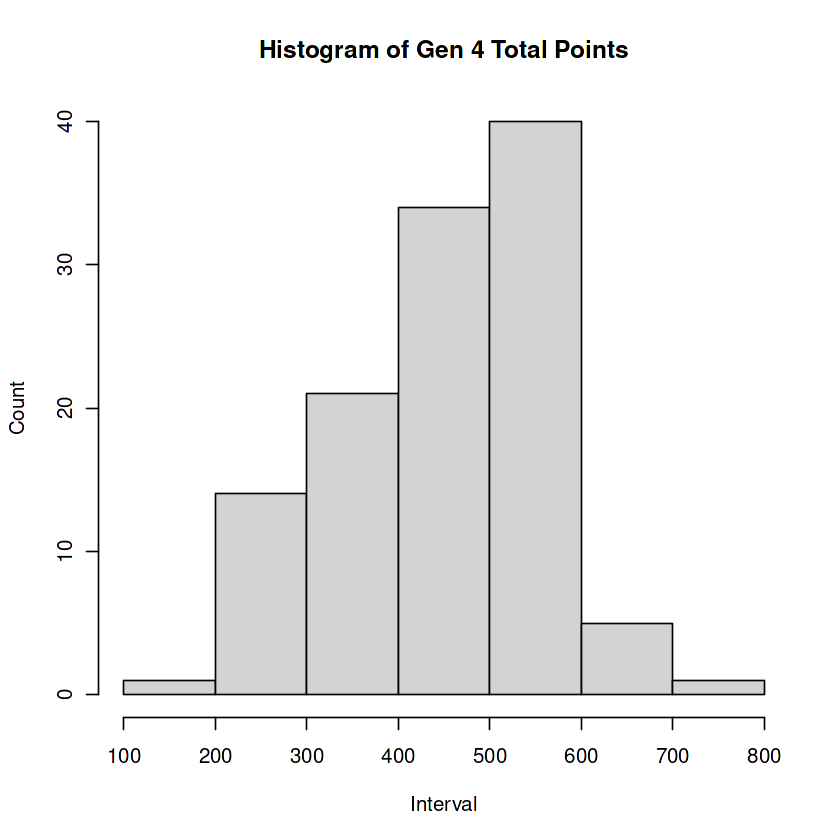

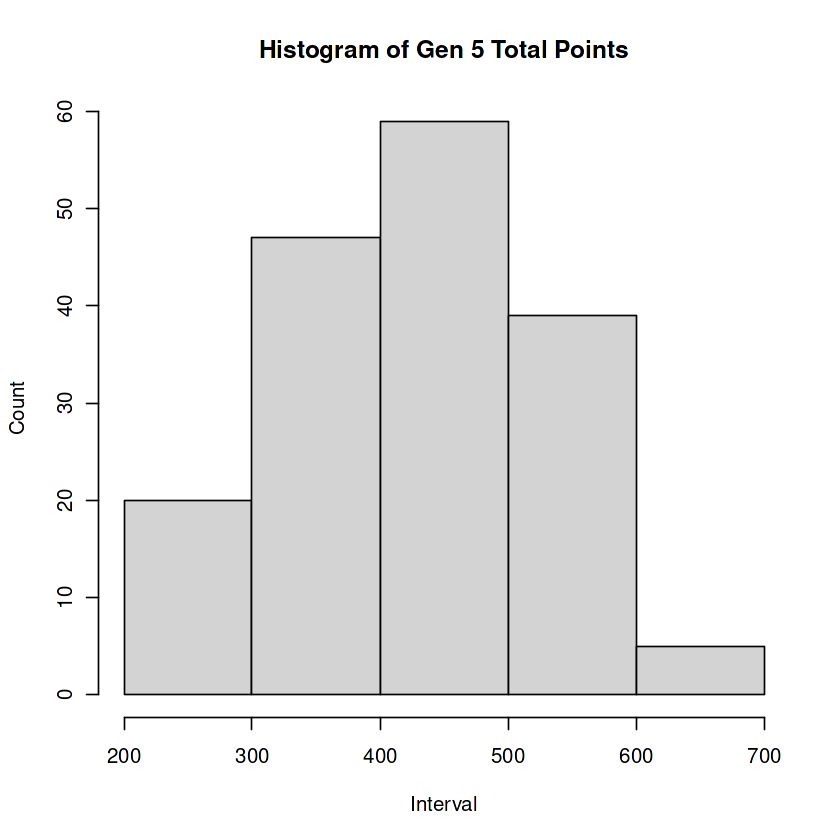

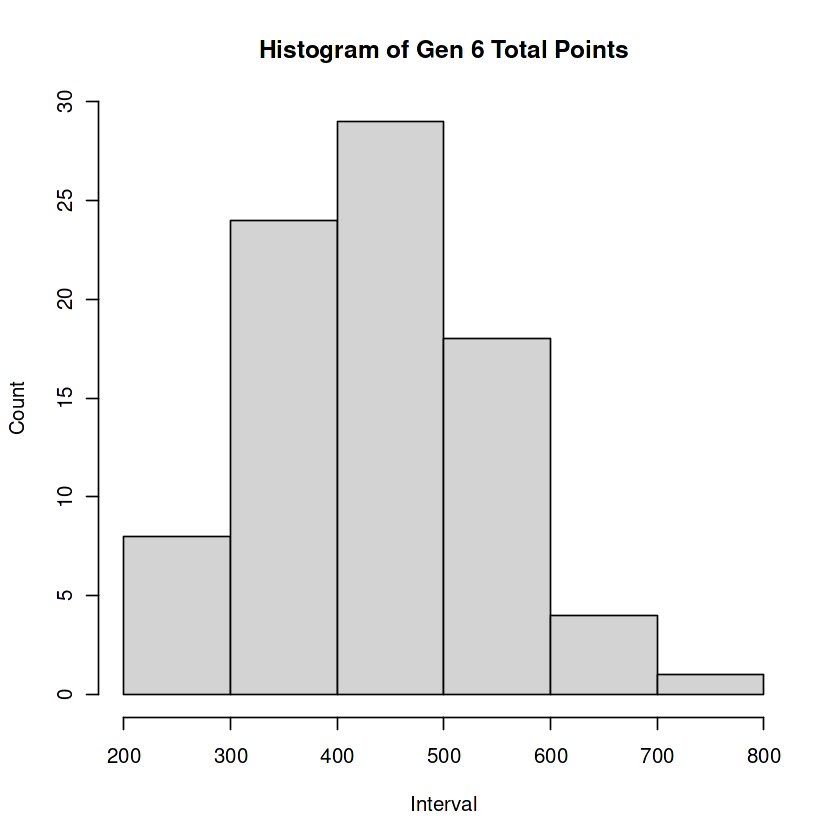

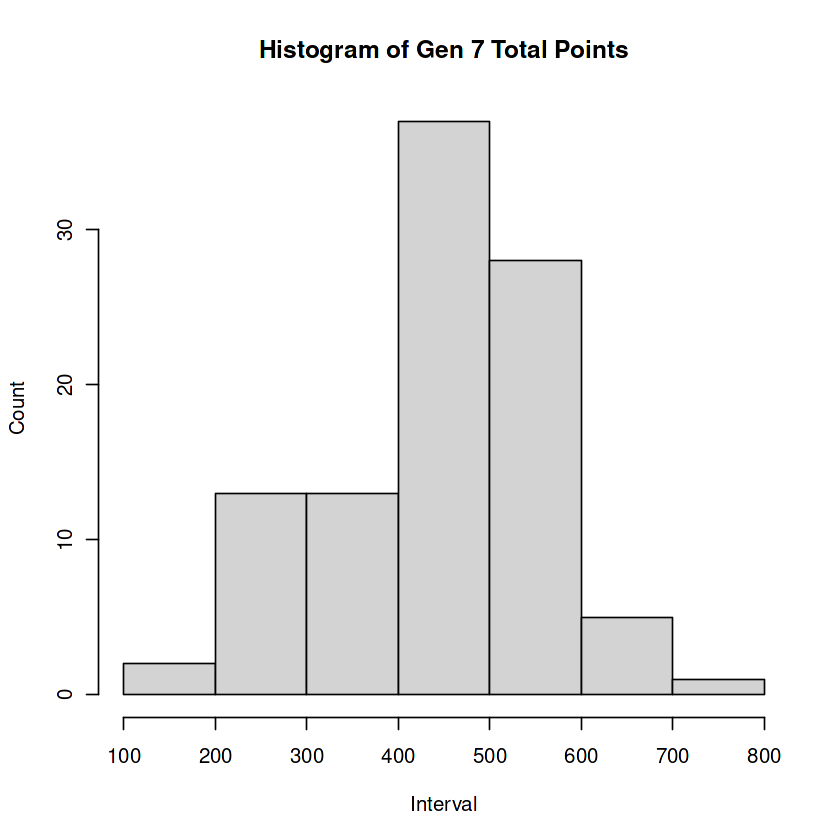

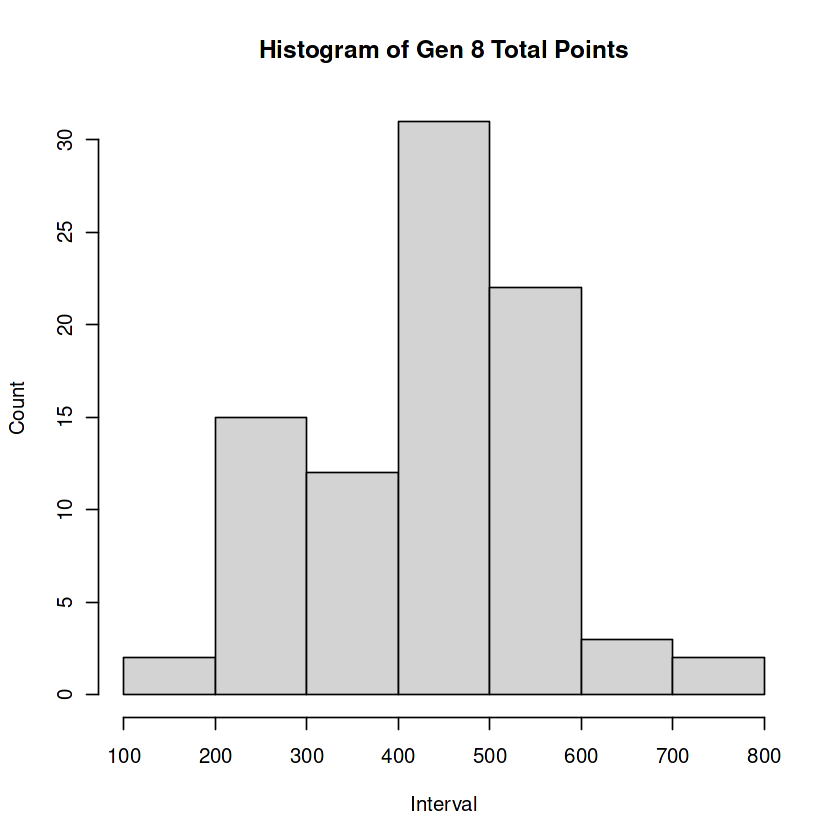

In [18]:
for (i in 1:8) hist(pokedex_kor[pokedex_kor$generation==i,]$total_points, nclass=6, main=paste("Histogram of Gen", i, "Total Points"), xlab="Interval", ylab="Count")

## Topic 3: 성장률에 미치는 값은 무엇인가 ?

In [19]:
head(pokedex_kor)

,pokedex_number,eng_name,kor_name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,이상해씨,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,이상해풀,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,이상해꽃,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,4,Charmander,파이리,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
5,5,Charmeleon,리자드,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5
6,6,Charizard,리자몽,1,Normal,2,Fire,Flying,1.7,90.5,534,78,84,78,109,85,100,45,Medium Slow,87.5


In [20]:
# Run Once
pokedex_kor[pokedex_kor$growth_rate == "", ]$growth_rate <- "Medium Slow"

불비달마의 데이터에서 growth_rate가 없어서 직접 처리해주었다.

In [21]:
levels(factor(pokedex_kor$growth_rate))

[1] "Erratic"     "Fast"        "Fluctuating" "Medium Fast" "Medium Slow"
[6] "Slow"

각 값에 대한 포켓몬 위키의 설명
- Erratic: 600,000 exp at level 100
- Fast: 800,000 exp at level 100
- medium fast: 1,000,000 exp at level 100
- medium slow: 1,059,860 exp at level 100
- slow: 1,250,000 exp at level 100
- Fluctuating: 1,640,000 exp at level 100  
Source: http://bulbapedia.bulbagarden.net/wiki/Experience

In [22]:
levels(factor(pokedex_kor$status))

[1] "Legendary"     "Mythical"      "Normal"        "Sub Legendary"

In [23]:
pokedex_gr <- pokedex_kor %>% select(pokedex_number, growth_rate, generation, status, height_m, weight_kg, total_points, hp, attack, sp_attack, sp_defense, speed)
head(pokedex_gr)

,pokedex_number,growth_rate,generation,status,height_m,weight_kg,total_points,hp,attack,sp_attack,sp_defense,speed
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Medium Slow,1,Normal,0.7,6.9,318,45,49,65,65,45
2,2,Medium Slow,1,Normal,1.0,13.0,405,60,62,80,80,60
3,3,Medium Slow,1,Normal,2.0,100.0,525,80,82,100,100,80
4,4,Medium Slow,1,Normal,0.6,8.5,309,39,52,60,50,65
5,5,Medium Slow,1,Normal,1.1,19.0,405,58,64,80,65,80
6,6,Medium Slow,1,Normal,1.7,90.5,534,78,84,109,85,100


In [24]:
gr <- c("Erratic", "Fast", "Medium Fast", "Medium Slow", "Slow", "Fluctuating")
str_to_num <- function(df){
    for (i in 1:6) if (df[2] == gr[i]) df[2] <- i*10
    df[4] <- ifelse(df[4] == "Normal", 0, 1)
    df
}
pokedex_gr <- as.data.frame(t(apply(pokedex_gr, 1, str_to_num)))
pokedex_gr <- as.data.frame(sapply(pokedex_gr, as.numeric))
head(pokedex_gr)

,pokedex_number,growth_rate,generation,status,height_m,weight_kg,total_points,hp,attack,sp_attack,sp_defense,speed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,40,1,0,0.7,6.9,318,45,49,65,65,45
2,2,40,1,0,1.0,13.0,405,60,62,80,80,60
3,3,40,1,0,2.0,100.0,525,80,82,100,100,80
4,4,40,1,0,0.6,8.5,309,39,52,60,50,65
5,5,40,1,0,1.1,19.0,405,58,64,80,65,80
6,6,40,1,0,1.7,90.5,534,78,84,109,85,100


In [25]:
attach(pokedex_gr)

**가설 2. 전설이나 환상 포켓몬은 일반 포켓몬에 비해 성장률이 느릴 것이다.**

In [26]:
model1_gr <- lm(growth_rate ~ generation + factor(status) + height_m + weight_kg + hp + attack + sp_attack + sp_defense + speed)
summary(model1_gr)


Call:
lm(formula = growth_rate ~ generation + factor(status) + height_m + 
    weight_kg + hp + attack + sp_attack + sp_defense + speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.162  -4.893  -2.460   5.540  27.354 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.416106   1.332724  24.323  < 2e-16 ***
generation      -0.075916   0.130674  -0.581 0.561404    
factor(status)1 12.785903   1.161953  11.004  < 2e-16 ***
height_m         0.289713   0.305616   0.948 0.343385    
weight_kg        0.005321   0.003392   1.569 0.117084    
hp               0.013416   0.013799   0.972 0.331171    
attack           0.034033   0.011842   2.874 0.004143 ** 
sp_attack        0.016598   0.012532   1.324 0.185657    
sp_defense      -0.044661   0.012773  -3.497 0.000492 ***
speed            0.004795   0.011800   0.406 0.684569    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.999 on 968 degrees o

**결론 2. 전설이나 환상 포켓몬은 일반 포켓몬에 비해 성장률이 느리다.**  
factor(status), attack, sp_defense의 p-value가 0.01보다 낮아 성장률을 설명하는데 매우 유의해 보인다.  
전설이나 환상인 경우 일반 포켓몬보다 평균적으로 12.785903 성장률 수치가 크다(더 느리게 성장한다).  
평균적으로 공격이 높을수록 성장률 수치가 0.034033 크고, 특수방어가 높을수록 성장률 수치가 0.044661 낮다.  
나머지 변수들은 성장률에 관해 유의미하게 설명할 수 없다.

앞서 말했던 3개의 유의미한 변수를 가지고 회귀분석을 새로 진행하였다.

In [27]:
model2_gr <- lm(growth_rate ~ factor(status) + attack + sp_defense)
summary(model2_gr)


Call:
lm(formula = growth_rate ~ factor(status) + attack + sp_defense)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.728  -4.924  -2.559   5.485  27.451 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.52959    1.06710  30.484  < 2e-16 ***
factor(status)1 14.19756    1.05104  13.508  < 2e-16 ***
attack           0.05232    0.01021   5.123 3.62e-07 ***
sp_defense      -0.02870    0.01148  -2.501   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.033 on 974 degrees of freedom
Multiple R-squared:  0.2331,	Adjusted R-squared:  0.2307 
F-statistic: 98.68 on 3 and 974 DF,  p-value: < 2.2e-16


F-test 결과 모델의 p-value가 거의 0에 가까워서 모델이 유의함을 볼 수 있다. 이 모델에 따르면, 전설이나 환상인 경우 일반 포켓몬보다 평균적으로 14.19756 성장률 수치가 크다. 평균적으로 공격이 높을수록 0.05242씩 크고, 특수방어가 높을수록 0.0287씩 낮다.

In [28]:
anova(model2_gr, model1_gr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,974,79477.44,NA,NA,NA,NA
2,968,78387.68,6,1089.759,2.242884,0.03721396


이후, 처음 모델 1(Full model)과 모델 2(Reduced model)를 비교하였다.
유의수준 0.05를 기준으로 하면 F-test에서 p-value가 0.05보다 작기 때문에,
**모델 2가 성장률을 설명하는데 모델 1과 유의미한 차이가 없다는 것을 볼 수 있다.** 

## Read csv file from kaggle

In [29]:
pwc_original <- read.csv("/kaggle/input/complete-competitive-pokmon-datasets-may-2022/df_pokemon.csv", header=T)

In [30]:
head(pwc_original)
names(pwc_original)

,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,Type2,⋯,Attack,Defense,Sp..Atk,Sp..Def,Speed,image_url,VGC2022_rules,Monthly.Usage..k.,Usage.Percent....,Monthly.Rank
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Bulbasaur,Bulbasaur,,1,Common,,False,Grass,Poison,⋯,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png,Permitted,,,
2,2,Ivysaur,Ivysaur,,1,Common,Bulbasaur,False,Grass,Poison,⋯,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield/icon/ivysaur.png,Permitted,,,
3,3,Venusaur,Venusaur,,1,Common,Ivysaur,True,Grass,Poison,⋯,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield/icon/venusaur.png,Permitted,204,7,24
4,3,Mega Venusaur,Venusaur,Mega,6,Common,Venusaur,True,Grass,Poison,⋯,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield/icon/venusaur-mega.png,Banned,,,
5,3,Venusaur Gigantamax,Venusaur,Gigantamax,8,,Venusaur,,Grass,Poison,⋯,NA,NA,NA,NA,NA,https://archives.bulbagarden.net/media/upload/d/dc/003GiMS8.png,Gigantamax Allowed,,,
6,4,Charmander,Charmander,,1,Common,,False,Fire,,⋯,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield/icon/charmander.png,Permitted,,,


[1] "ID"                "Name"              "Species"          
 [4] "Variant"           "Generation"        "Rarity"           
 [7] "Evolves_from"      "Has_gender_diff"   "Type1"            
[10] "Type2"             "Total"             "HP"               
[13] "Attack"            "Defense"           "Sp..Atk"          
[16] "Sp..Def"           "Speed"             "image_url"        
[19] "VGC2022_rules"     "Monthly.Usage..k." "Usage.Percent...."
[22] "Monthly.Rank"

In [31]:
pwc <- pwc_original %>% select(ID, Name, Variant, Generation, Type1, Type2, Total, HP, Attack, Defense, Sp..Atk, Sp..Def, Speed, VGC2022_rules, Monthly.Usage..k., Usage.Percent...., Monthly.Rank)
names(pwc)[c(11:12, 15:17)] <- c("Sp_Attack", "Sp_Defense", "Monthly_Usage", "Usage_Percent", "Monthly_Rank")
names(pwc)

[1] "ID"            "Name"          "Variant"       "Generation"   
 [5] "Type1"         "Type2"         "Total"         "HP"           
 [9] "Attack"        "Defense"       "Sp_Attack"     "Sp_Defense"   
[13] "Speed"         "VGC2022_rules" "Monthly_Usage" "Usage_Percent"
[17] "Monthly_Rank"

In [32]:
pwc_used <- pwc[pwc$Monthly_Rank != "" & pwc$Monthly_Rank != "-", ]
pwc_used[15:17] <- as.data.frame(sapply(pwc_used[15:17], as.integer))
head(pwc_used)

,ID,Name,Variant,Generation,Type1,Type2,Total,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed,VGC2022_rules,Monthly_Usage,Usage_Percent,Monthly_Rank
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
3,3,Venusaur,,1,Grass,Poison,525,80,82,83,100,100,80,Permitted,204,7,24
11,6,Charizard,,1,Fire,Flying,534,78,84,78,109,85,100,Permitted,344,19,12
15,9,Blastoise,,1,Water,,530,79,83,100,85,105,78,Permitted,98,7,23
20,12,Butterfree,,1,Bug,Flying,395,60,45,50,90,80,70,Permitted,16,0,152
38,25,Pikachu,,1,Electric,,320,35,55,40,50,50,90,Permitted,13,0,119
41,26,Raichu,,1,Electric,,485,60,90,55,90,80,110,Permitted,93,3,35


## Topic 4: 포켓몬 월드 챔피언쉽에서의 포켓몬 분포

종족값 분포

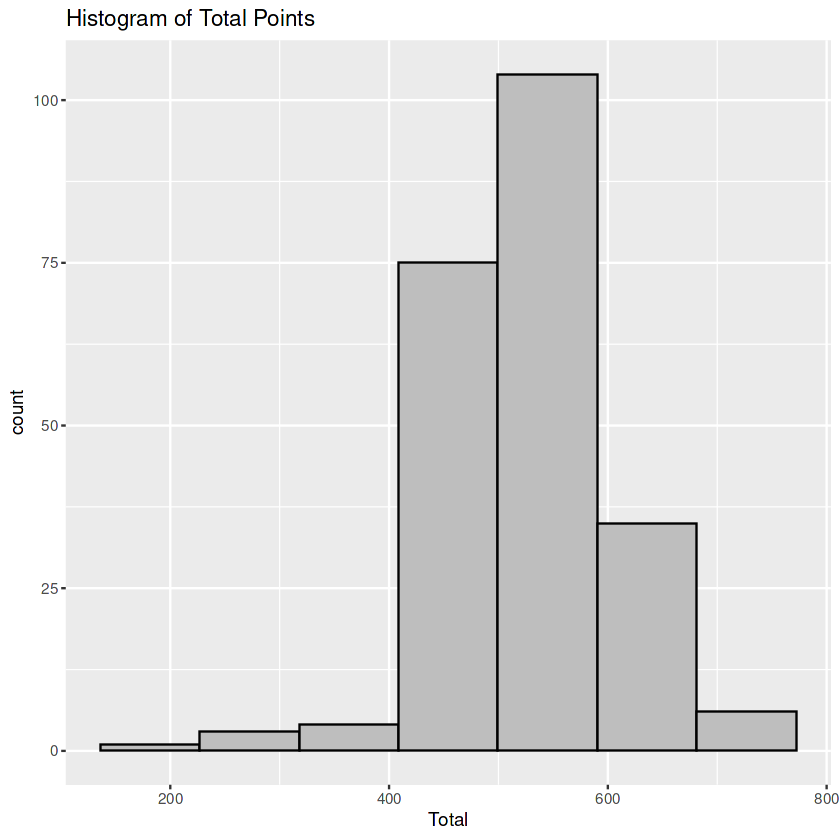

In [33]:
pwc_used %>% ggplot(aes(Total)) + geom_histogram(bins=7, colour='black', fill="gray") + labs(title="Histogram of Total Points")

타입 분포

,8,18,3,15,17,4,9,10,5,7,2,13,6,12,11,16,1,14
Type,Flying,Water,Dragon,Psychic,Steel,Electric,Ghost,Grass,Fairy,Fire,Dark,Normal,Fighting,Ice,Ground,Rock,Bug,Poison
Count,33,33,29,27,26,22,21,21,20,20,19,19,18,17,16,14,12,11


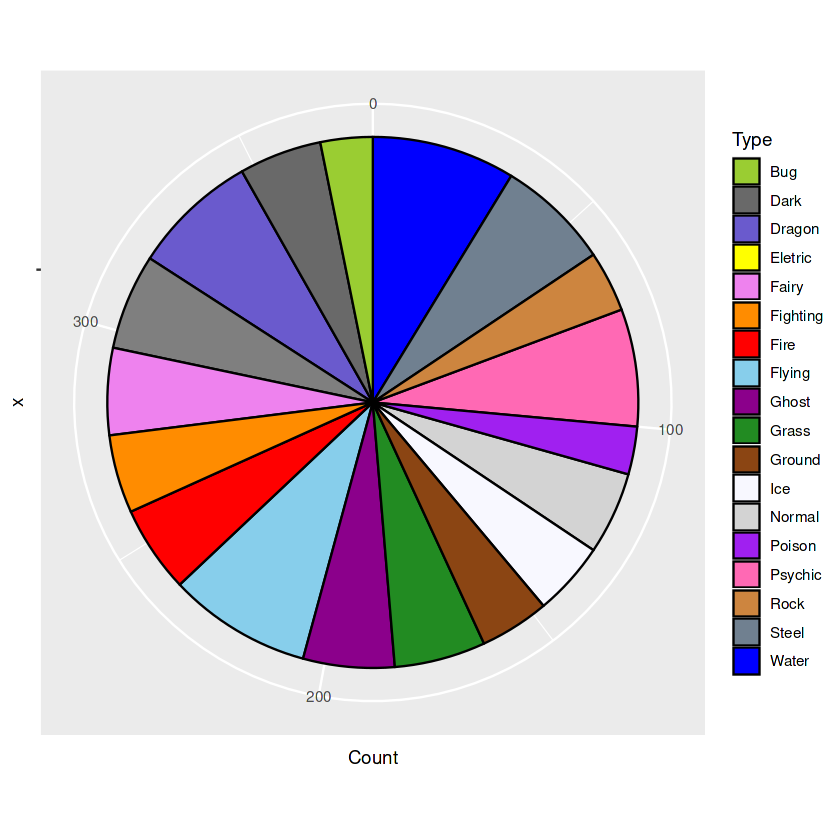

In [34]:
type1_cnt <- pwc_used %>% group_by(Type1) %>% summarise(Count=n())
type2_cnt <- pwc_used %>% group_by(Type2) %>% summarise(Count=n())
type2_cnt <- type2_cnt[-1,]
type_cnt <- data.frame(Type=type1_cnt$Type1, Count=type1_cnt$Count + type2_cnt$Count)
type_cnt <- type_cnt[order(type_cnt$Count, decreasing=T), ]
t(type_cnt)
type_cnt %>% ggplot(aes(x="", y=Count, fill=Type)) + geom_bar(stat="identity", colour="black") + coord_polar(theta="y") + scale_fill_manual(
    values = c('Bug'="yellowgreen", 'Dark'="dimgray", 'Dragon'="slateblue", 'Eletric'="yellow", 'Fairy'="violet", 'Fighting'="darkorange", 'Fire'="red", 'Flying'="skyblue", 'Ghost'="darkmagenta", 'Grass'="forestgreen", 'Ground'="saddlebrown", 'Ice'="ghostwhite", 'Normal'="lightgray", 'Poison'="purple", 'Psychic'="hotpink", 'Rock'="peru", 'Steel'="slategray", 'Water'="blue"))


표와 원 그래프를 보면 알 수 있듯이, **물 = 비행 > 드래곤 > 에스퍼 > ... 순으로 자주 등장하는 것을 볼 수 있다.**

## Topic 5: 종족값과 순위의 관계

In [35]:
head(pwc_used)

,ID,Name,Variant,Generation,Type1,Type2,Total,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed,VGC2022_rules,Monthly_Usage,Usage_Percent,Monthly_Rank
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
3,3,Venusaur,,1,Grass,Poison,525,80,82,83,100,100,80,Permitted,204,7,24
11,6,Charizard,,1,Fire,Flying,534,78,84,78,109,85,100,Permitted,344,19,12
15,9,Blastoise,,1,Water,,530,79,83,100,85,105,78,Permitted,98,7,23
20,12,Butterfree,,1,Bug,Flying,395,60,45,50,90,80,70,Permitted,16,0,152
38,25,Pikachu,,1,Electric,,320,35,55,40,50,50,90,Permitted,13,0,119
41,26,Raichu,,1,Electric,,485,60,90,55,90,80,110,Permitted,93,3,35


In [36]:
attach(pwc_used)

**가설 3. 종족값 총합이 높을수록 순위는 높을 것이다.**

In [37]:
model1_rank <- lm(Monthly_Rank ~ Total)
summary(model1_rank)


Call:
lm(formula = Monthly_Rank ~ Total)

Residuals:
     Min       1Q   Median       3Q      Max 
-143.470  -51.186   -4.377   51.919  121.658 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 220.83656   27.68152   7.978 7.42e-14 ***
Total        -0.20071    0.05163  -3.887 0.000133 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64 on 226 degrees of freedom
Multiple R-squared:  0.06267,	Adjusted R-squared:  0.05852 
F-statistic: 15.11 on 1 and 226 DF,  p-value: 0.0001333


F-test 결과, p-value가 매우 작아 종족값은 순위를 설명하는데 유의미한 것처럼 보인다.  
회귀계수가 음수인 것을 보아, 평균적으로 종족값이 클수록 순위값이 작아짐을 볼 수 있다. (순위가 높아짐)

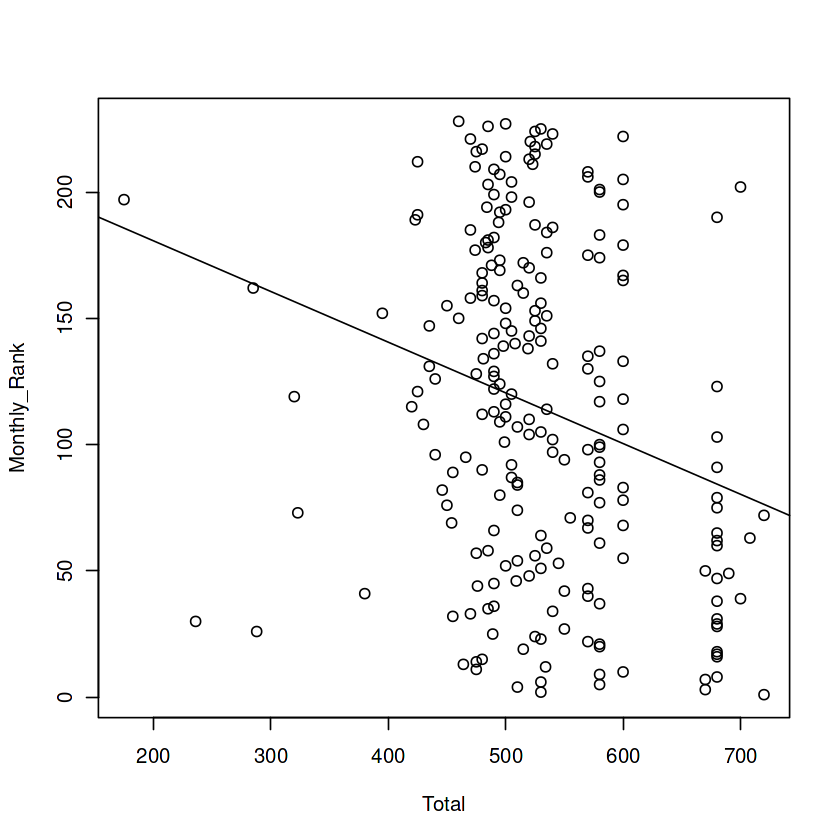

In [38]:
plot(Monthly_Rank ~ Total)
abline(model1_rank)

다만 실제로 종족값과 순위에 관한 산점도와 선형회귀모델 그래프를 그려보았는데, 수치상 유의미할지라도 **그래프상 선형 회귀 모델이 그렇게 유의하다고 보기는 어려워 보인다.**  
**결론 3. ‘종족값 총합이 높을수록 순위는 높을 것이다.’라는 가설을 지지할 수 없다.**

다음으로 종족값에 해당하는 체력, 공격, 방어, 특수공격, 특수방어, 속도를 변수로 하여 선형회귀모델을 만들었다.

In [39]:
model2_rank <- lm(Monthly_Rank ~  HP + Attack + Defense + Sp_Attack + Sp_Defense + Speed)
summary(model2_rank)


Call:
lm(formula = Monthly_Rank ~ HP + Attack + Defense + Sp_Attack + 
    Sp_Defense + Speed)

Residuals:
     Min       1Q   Median       3Q      Max 
-138.373  -52.238    1.279   50.331  127.766 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 220.57355   28.61164   7.709 4.26e-13 ***
HP           -0.02391    0.15174  -0.158   0.8749    
Attack       -0.43479    0.16794  -2.589   0.0103 *  
Defense       0.07189    0.19307   0.372   0.7100    
Sp_Attack    -0.15698    0.14653  -1.071   0.2852    
Sp_Defense   -0.50441    0.19954  -2.528   0.0122 *  
Speed        -0.12265    0.16211  -0.757   0.4501    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.19 on 221 degrees of freedom
Multiple R-squared:  0.078,	Adjusted R-squared:  0.05297 
F-statistic: 3.116 on 6 and 221 DF,  p-value: 0.005967


p-value가 0.05보다 작은 것으로 보아, 이 모델 또한 유의미하다고 볼 수 있다. **특히, 공격과 특수방어는 모델에 있어 유의미한 변수로 볼 수 있다.**  
그래서 공격과 특수방어만으로 선형회귀모델을 만들었다.

In [40]:
model3_rank <- lm(Monthly_Rank ~ Attack + Sp_Defense)
summary(model3_rank)


Call:
lm(formula = Monthly_Rank ~ Attack + Sp_Defense)

Residuals:
     Min       1Q   Median       3Q      Max 
-129.538  -55.266    1.188   54.712  122.121 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 200.1926    22.3235   8.968  < 2e-16 ***
Attack       -0.4447     0.1427  -3.117  0.00207 ** 
Sp_Defense   -0.4857     0.1638  -2.965  0.00335 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 64.11 on 225 degrees of freedom
Multiple R-squared:  0.06381,	Adjusted R-squared:  0.05549 
F-statistic: 7.668 on 2 and 225 DF,  p-value: 0.0006002


p-value가 더 작아졌고, R-squared 값도 작아진 것을 보아 모델 2보다 더 유의미한 모델임을 볼 수 있다. 이 모델을 해석하자면, 평균적으로 공격이 1 증가하면 순위는 0.4447 만큼 높아지고 (값이 작아지고), 특수방어가 1 증가하면 순위는 0.4857 만큼 높아진다 (값이 작아진다). **즉, 평균적으로 순위가 높은 포켓몬들은 공격과 특수방어가 높다는 것을 알 수 있다.**

In [41]:
anova(model3_rank, model2_rank)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,225,924650.5,NA,NA,NA,NA
2,221,910638.2,4,14012.23,0.8501461,0.494815


모델 2(Full model)와 모델 3(Reduced model)을 비교하였다. 유의수준 0.05를 기준으로, F-test에서 p-value가 0.05보다 훨씬 크기 때문에, 모델 2가 성장률을 설명하는데 모델 1과 유의미한 차이가 있다는 것을 볼 수 있다. **즉, 모델 2를 기각하고 모델 3을 사용하는 것이 더 유의미함을 알 수 있다.**

## Topic 6: 종족값과 사용 빈도의 관계

**가설 4. 종족값 총합이 높을수록, 사용 빈도 또한 높을 것이다.**

종족값과 사용 빈도와 관련하여 선형 회귀 모델을 만들어보았다.

In [42]:
model1_usage <- lm(Monthly_Usage ~ Total)
summary(model1_usage)


Call:
lm(formula = Monthly_Usage ~ Total)

Residuals:
    Min      1Q  Median      3Q     Max 
-130.62  -63.09  -46.95  -21.99 1054.91 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -144.5649    71.5549   -2.02  0.04453 * 
Total          0.4031     0.1335    3.02  0.00281 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.4 on 226 degrees of freedom
Multiple R-squared:  0.0388,	Adjusted R-squared:  0.03455 
F-statistic: 9.123 on 1 and 226 DF,  p-value: 0.002814


F-test 결과 p-value가 0.05보다 작아, 이 모델은 유의미하다는 것을 볼 수 있다. 회귀계수가 양수기 때문에, 종족값이 높을수록 사용 빈도도 높아지는 것으로 보인다.

산점도와 선형회귀모델을 함께 그려보았는데, 어느 정도 선형성을 가지고 있다고 볼 수 있을 것 같다.

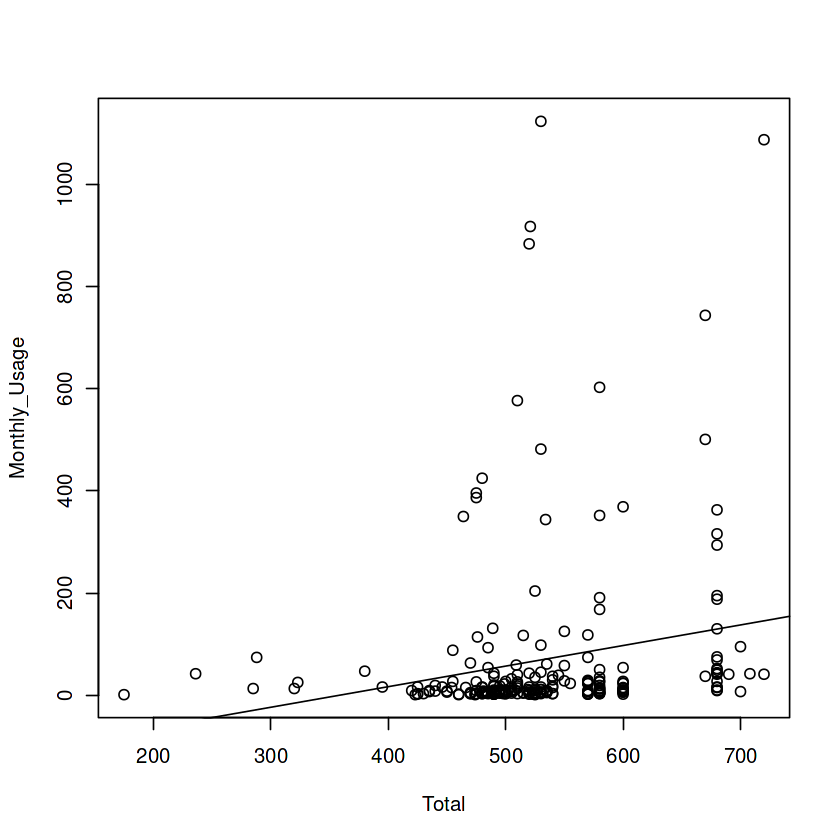

In [43]:
plot(Monthly_Usage ~ Total)
abline(model1_usage)

다만 큰 종족값에서 사용 빈도가 크게 증가하기에, 지수함수와 같은 형태인 비선형 모델이 더 적절할 것 같아 다음과 같은 LOESS 모델도 그래프 상에 그려보았다. 하지만, LOESS 모델과 선형 모델은 큰 차이가 없는 것으로 보인다.  
선형회귀모델 및 LOESS 모델 둘 다 평균적으로 종족값 총합이 증가할 때 사용빈도가 높아지는 것으로 보인다. 즉, 다음과 같은 결론 4를 도출할 수 있다.  
**결론 4. 종족값 총합이 높을수록, 사용 빈도 또한 높아진다.**

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



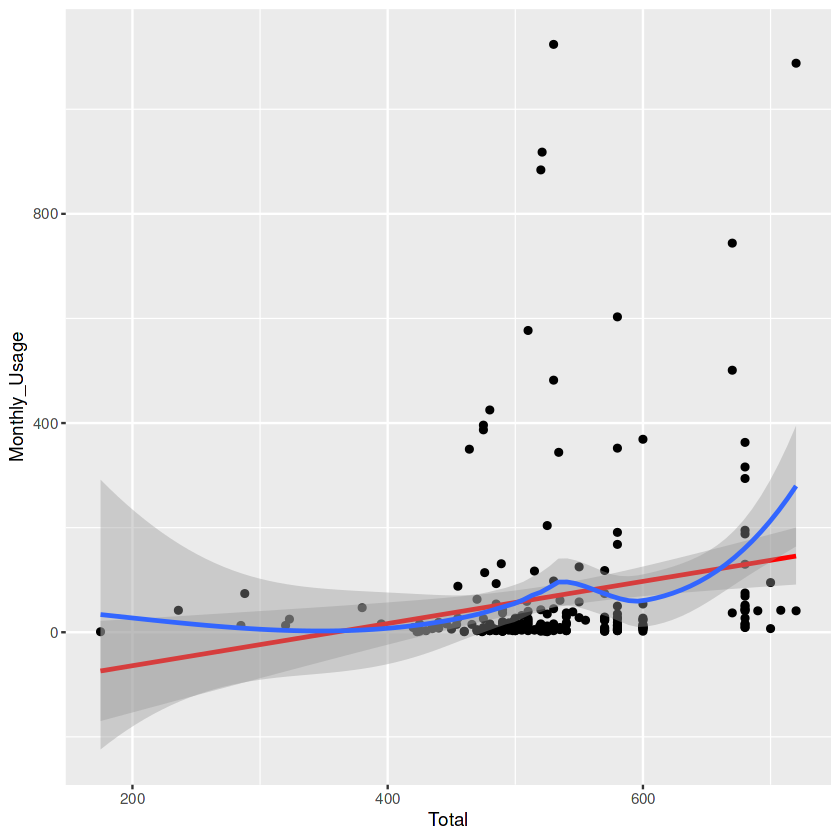

In [44]:
pwc_used %>% ggplot(aes(x=Total, y=Monthly_Usage)) + geom_point() + geom_smooth(method="lm", color="red") + geom_smooth(method="loess")

선형회귀모델의 가정을 판단하기 위해 다음과 같은 그래프를 그려보았다.

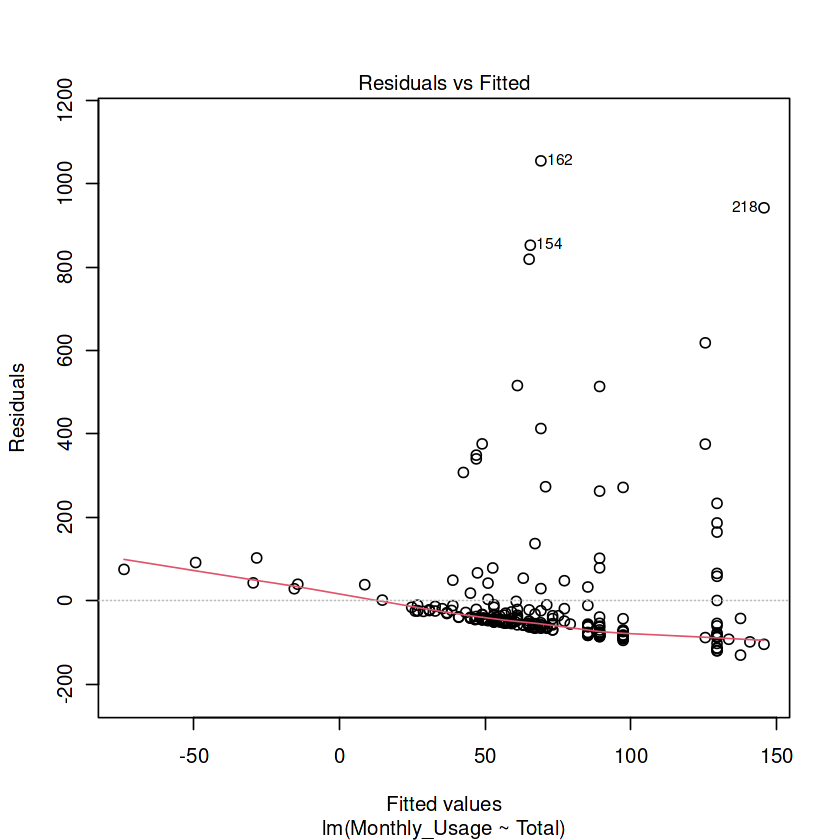

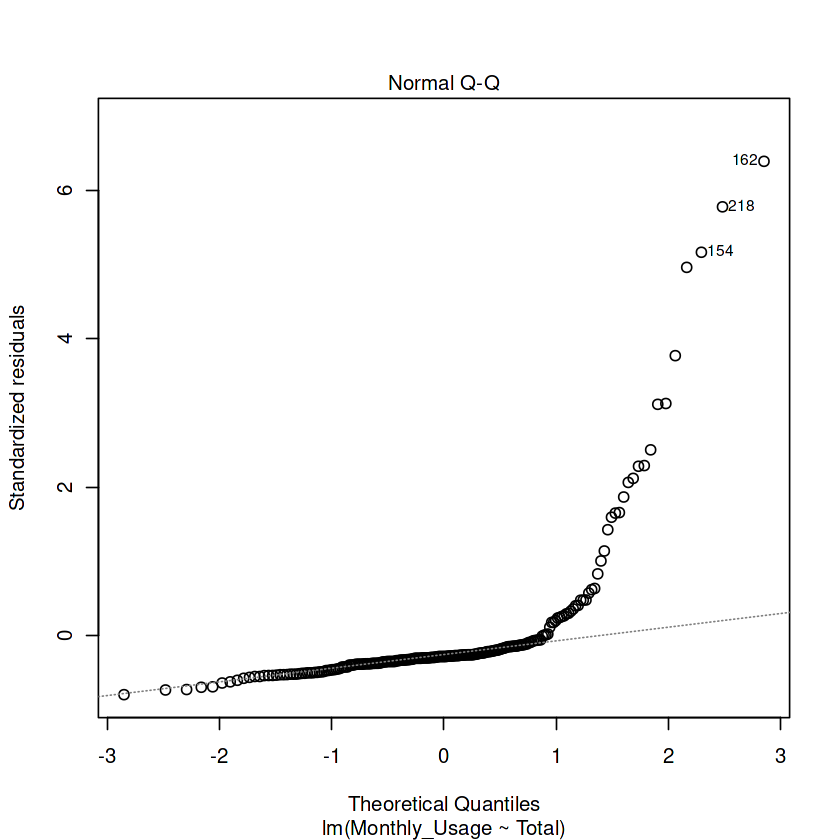

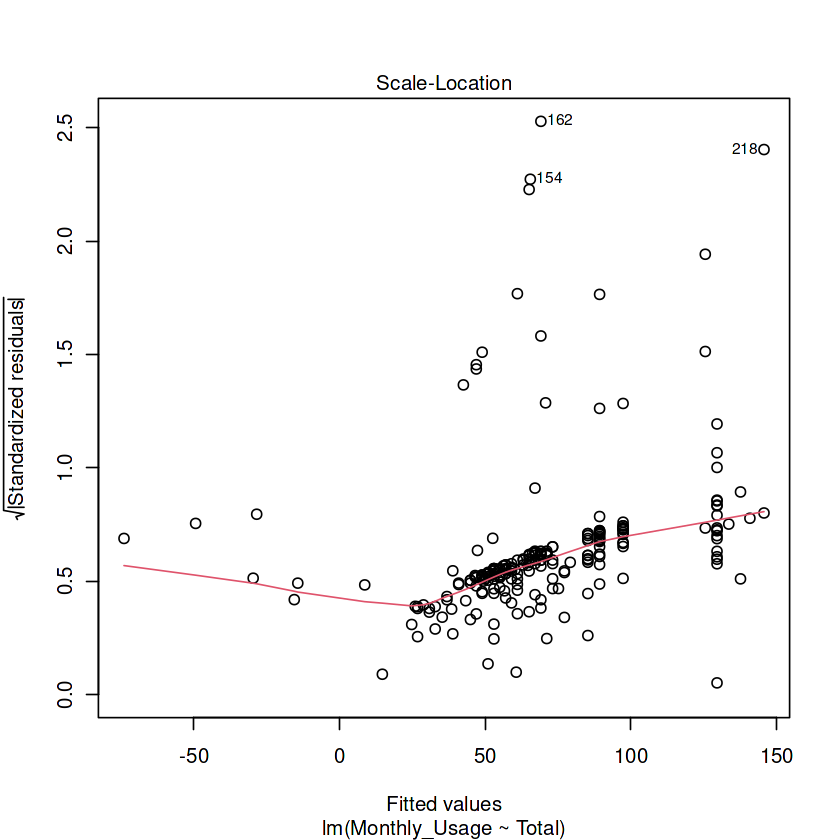

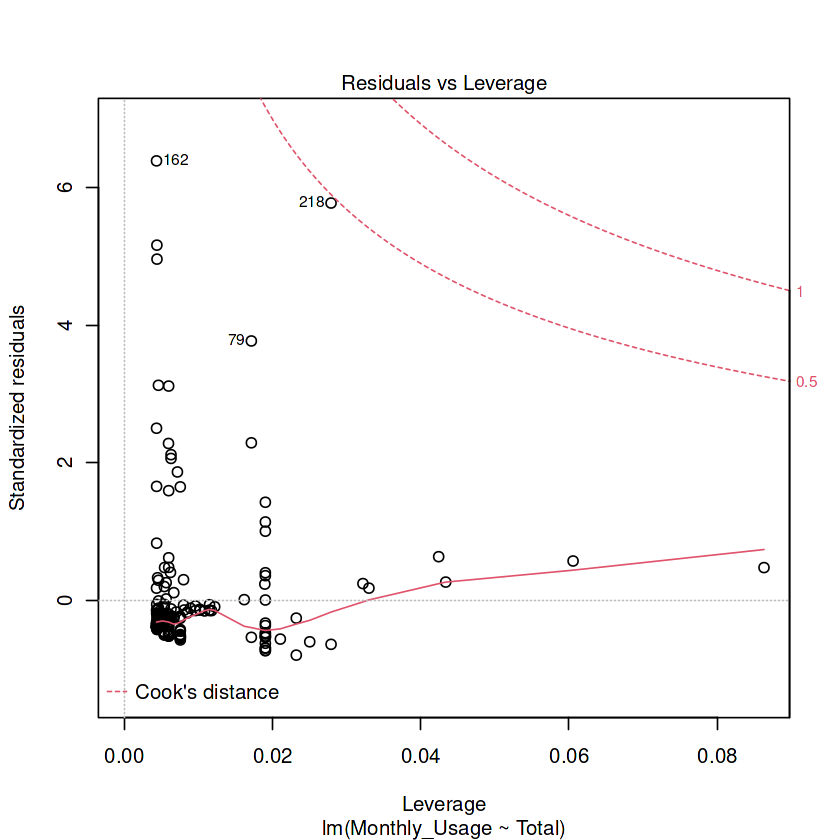

In [45]:
plot(model1_usage)

1. 비록 위에 데이터들이 크게 퍼져 있긴 하나, 아래에 데이터가 많아 잔차의 평균이 0에 가까운 것으로 보인다.
2. 잔차의 Normality 가정이 위반된 것으로 보인다.
3. 몇 개의 Outlier들이 있는 것으로 보인다.

In [46]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [47]:
model2_usage <- lqs(Monthly_Usage ~ Total)
model2_usage

Call:
lqs.formula(formula = Monthly_Usage ~ Total)

Coefficients:
(Intercept)        Total  
   -1.91227      0.01481  

Scale estimates 7.573 6.471 


그래서 Outlier를 제외하고 선형회귀분석을 하기 위해 로버스트 선형회귀분석을 통해 모델을 만들었다. 평균적으로 종족값이 1 증가하면 사용 빈도가 0.01515만큼 증가한다는 점을 볼 수 있다.

다음으로 종족값에 해당하는 체력, 공격, 방어, 특수공격, 특수방어, 속도를 변수로 하여 선형회귀모델을 만들었다.

In [48]:
model3_usage <- lm(Monthly_Usage ~ HP + Attack + Defense + Sp_Attack + Sp_Defense + Speed)
summary(model3_usage)


Call:
lm(formula = Monthly_Usage ~ HP + Attack + Defense + Sp_Attack + 
    Sp_Defense + Speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-152.92  -70.99  -45.50  -10.37 1050.33 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -151.00833   73.81521  -2.046   0.0420 *
HP             0.03995    0.39147   0.102   0.9188  
Attack         0.98903    0.43327   2.283   0.0234 *
Defense        0.22433    0.49809   0.450   0.6529  
Sp_Attack      0.11876    0.37804   0.314   0.7537  
Sp_Defense     0.41005    0.51480   0.797   0.4266  
Speed          0.67586    0.41823   1.616   0.1075  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.6 on 221 degrees of freedom
Multiple R-squared:  0.0582,	Adjusted R-squared:  0.03263 
F-statistic: 2.276 on 6 and 221 DF,  p-value: 0.03752


F-test 결과 p-value가 0.05보다 작기에 이 모델은 유의미하다고 볼 수 있다. 특히, 공격력의 p-value가 0.05보다 작아 유의미한 변수로 볼 수 있다.

In [49]:
model4_usage <- lm(Monthly_Usage ~ Attack)
summary(model4_usage)


Call:
lm(formula = Monthly_Usage ~ Attack)

Residuals:
    Min      1Q  Median      3Q     Max 
-143.88  -70.70  -43.14  -10.33 1033.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -36.550     36.166  -1.011  0.31329   
Attack         1.103      0.360   3.063  0.00246 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.4 on 226 degrees of freedom
Multiple R-squared:  0.03985,	Adjusted R-squared:  0.0356 
F-statistic: 9.379 on 1 and 226 DF,  p-value: 0.00246


F-test 결과 p-value가 0.05보다 작아 이 모델이 유의하다는 것을 볼 수 있다. 평균적으로 공격력이 1만큼 증가하면, 사용 빈도는 1.103만큼 증가한다. **즉, 공격력이 높은 포켓몬을 사람들이 많이 사용한다는 점을 알 수 있다.**

In [50]:
anova(model4_usage, model3_usage)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,226,6179203,NA,NA,NA,NA
2,221,6061110,5,118092.5,0.8611769,0.5080063


모델 3(Full model)과 모델 4(Reduced model)을 비교하였다. F-test에서 p-value가 0.05보다 훨씬 크기 때문에, **사용 빈도를 설명하는 데 있어 두 모델은 유의미한 차이가 존재한다고 볼 수 있다.**